# Data Analytics - Lab 6 - Model comparison

<span style="font-size: 20px;">
Konrad Prokop, 408687
</span>

In [37]:
from cmdstanpy import CmdStanModel
import arviz as az
import matplotlib.pyplot as plt

In [38]:
F = len("Konrad")
L = len("Prokop")
N = (L + F) * 100

In [39]:
model1 = CmdStanModel(stan_file='code_1.stan')
R = 1
sim1=model1.sample(data={'N': N},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [40]:
mod1 = sim1.draws_pd()
mod1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,1.53938,1.06042,0.055407,-0.253003,-2.5871,1.83186,0.595414,...,0.174509,-0.616106,2.00376,0.580656,-0.280964,0.472407,-0.08818,0.675159,0.329035,0.839065


In [41]:
model2 = CmdStanModel(stan_file='code_2.stan')
R = 1
sim2=model2.sample(data={'N': N},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [42]:
mod2 = sim2.draws_pd()
mod2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.077034,-0.167524,1.10731,0.297678,-1.31082,0.635439,-0.711822,-0.09457,...,2.44713,-0.232073,0.443544,3.13033,0.281936,-2.27183,1.18923,4.95402,-1.52661,3.45968


In [43]:
mod1.iloc[:, -N:]

,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,1.53938,1.06042,0.055407,-0.253003,-2.5871,1.83186,0.595414,0.882097,-0.020393,-0.554076,...,0.174509,-0.616106,2.00376,0.580656,-0.280964,0.472407,-0.08818,0.675159,0.329035,0.839065


In [44]:
model3 = CmdStanModel(stan_file='code_3.stan')
R = 1000
sim3=model3.sample(data={'N': N, 'y': mod1.iloc[0, -N:]},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [45]:
mod3 = sim3.draws_pd()
mod3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-1977.27,0.0,11.2534,0.0,1.0,1.0,1977.82,0.979602,0.303526,-1.69413,...,0.320143,-0.563898,-0.988161,1.016570,-0.073076,0.228243,-0.644513,-0.756815,-0.691295,-0.004185
1,-1977.27,0.0,11.2534,0.0,1.0,1.0,1977.42,0.979602,0.303526,-1.69413,...,2.089020,-0.598765,-1.093230,-0.384292,1.458810,1.020220,-1.612290,1.623460,0.239397,-1.480510
2,-1977.27,0.0,11.2534,0.0,1.0,1.0,1978.06,0.979602,0.303526,-1.69413,...,0.069082,0.888012,-0.558374,0.798420,0.396496,1.756140,1.408620,-0.326959,1.670940,0.270719
3,-1977.27,0.0,11.2534,0.0,1.0,1.0,1977.90,0.979602,0.303526,-1.69413,...,0.094995,-0.115841,-0.406270,0.655880,-0.708024,2.506480,-0.401784,-0.179107,0.720651,0.580580
4,-1977.27,0.0,11.2534,0.0,1.0,1.0,1978.31,0.979602,0.303526,-1.69413,...,0.429646,-0.091818,1.478670,3.604000,0.516092,0.344494,0.484101,1.799760,0.818664,0.524019


In [46]:
model4 = CmdStanModel(stan_file='code_4.stan')
R = 1000
sim4=model4.sample(data={'N': N, 'y': mod1.iloc[0, -N:]},
iter_sampling=R,
iter_warmup=1,
chains=1,
)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [47]:
mod4 = sim4.draws_pd()
mod4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1191],y_hat[1192],y_hat[1193],y_hat[1194],y_hat[1195],y_hat[1196],y_hat[1197],y_hat[1198],y_hat[1199],y_hat[1200]
0,-2246.86,0.0,5.79578,0.0,1.0,1.0,2248.88,1.61422,0.55151,1.5295,...,0.719598,-0.761900,-0.552071,1.509780,-0.132643,2.191440,3.766120,5.391410,1.539710,6.851950
1,-2246.86,0.0,5.79578,0.0,1.0,1.0,2248.99,1.61422,0.55151,1.5295,...,-0.067666,-0.274472,0.641439,-1.335480,-0.260879,-0.879424,0.898787,0.559105,-1.044010,-0.061658
2,-2246.86,0.0,5.79578,0.0,1.0,1.0,2247.61,1.61422,0.55151,1.5295,...,-0.395710,-3.114220,2.465490,-0.862621,-0.394891,-1.333530,-1.956060,3.347460,-1.619850,-0.586021
3,-2246.86,0.0,5.79578,0.0,1.0,1.0,2247.31,1.61422,0.55151,1.5295,...,3.252780,1.984300,1.424890,-1.037410,-2.612090,-0.089272,0.300298,1.057510,0.833351,4.212960
4,-2246.86,0.0,5.79578,0.0,1.0,1.0,2247.37,1.61422,0.55151,1.5295,...,1.743720,-2.853540,-2.923160,2.401780,-2.345950,-2.810450,1.206580,-0.326924,0.187769,-0.261580


In [48]:
comp_dict = {'m3': sim3, 'm4': sim4}
comp = az.compare(comp_dict, ic='waic', scale='deviance')

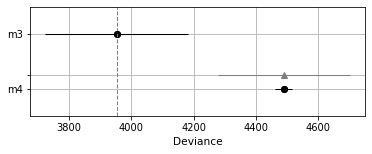

In [49]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [50]:
comp = az.compare(comp_dict, ic='loo', scale='deviance')

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


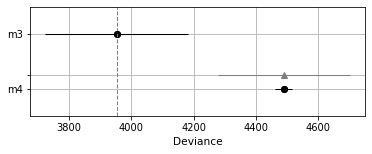

In [51]:
az.plot_compare(comp)
plt.grid()
plt.show()

In [52]:
model5 = CmdStanModel(stan_file='code_5.stan')

X = mod2.iloc[0, 2:-N-3].values.reshape((-1, 3))

N = 1200  
X = X[:N]  

R = 1000

sim5_1=model5.sample(data={'N': N, 'K': 1, 'y': mod2.iloc[0, -N:], 'X': X[:,:1]},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

sim5_2=model5.sample(data={'N': N, 'K': 2, 'y': mod2.iloc[0, -N:], 'X': X[:,:2]},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

sim5_3=model5.sample(data={'N': N, 'K': 3, 'y': mod2.iloc[0, -N:], 'X': X},
iter_sampling=R,
iter_warmup=1,
chains=1,
show_console=True
)

print('1 predictor:', sim5_1.draws_pd().head(),'2 predictors:', sim5_2.draws_pd().head().head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.050000 (Default)
Chain [1] delta = 0.800000 (Default)
Chain [1] kappa = 0.750000 (Default)
Chain [1] t0 = 10.000000 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1.000000 (Default)
Chain [1] stepsize_jitter = 0.000000 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = /tmp/tmp3_6znv3u/1tmil49q.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 81

INFO:cmdstanpy:Chain [1] done processing


Chain [1] Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Chain [1] Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/GA/Data-Analytics/lab6/code_5.stan', line 16, column 1 to column 23)
Chain [1] If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
Chain [1] but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Chain [1] 
Chain [1] Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Chain [1] Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/GA/Data-Analytics/lab6/code_5.stan', line 16, column 1 to column 23)
Chain [1] If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
Chain [1] but if this warning occurs

INFO:cmdstanpy:Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.050000 (Default)
Chain [1] delta = 0.800000 (Default)
Chain [1] kappa = 0.750000 (Default)
Chain [1] t0 = 10.000000 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1.000000 (Default)
Chain [1] stepsize_jitter = 0.000000 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = /tmp/tmp3_6znv3u/ipwk1cb8.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 10

INFO:cmdstanpy:Chain [1] done processing


Chain [1] Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Chain [1] Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/GA/Data-Analytics/lab6/code_5.stan', line 16, column 1 to column 23)
Chain [1] If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
Chain [1] but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.
Chain [1] 
Chain [1] Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Chain [1] Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/GA/Data-Analytics/lab6/code_5.stan', line 16, column 1 to column 23)
Chain [1] If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
Chain [1] but if this warning occurs

INFO:cmdstanpy:Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.050000 (Default)
Chain [1] delta = 0.800000 (Default)
Chain [1] kappa = 0.750000 (Default)
Chain [1] t0 = 10.000000 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1.000000 (Default)
Chain [1] stepsize_jitter = 0.000000 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = /tmp/tmp3_6znv3u/arbz0moy.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] seed = 88

INFO:cmdstanpy:Chain [1] done processing


Chain [1] Iteration:  901 / 1001 [ 90%]  (Sampling)
Chain [1] Iteration: 1001 / 1001 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0 seconds (Warm-up)
Chain [1] 0.935 seconds (Sampling)
Chain [1] 0.935 seconds (Total)
Chain [1] 
Chain [1] 
1 predictor:       lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -1962.95            0.0     14.3855          0.0           1.0          1.0   
1 -1962.95            0.0     14.3855          0.0           1.0          1.0   
2 -1962.95            0.0     14.3855          0.0           1.0          1.0   
3 -1962.95            0.0     14.3855          0.0           1.0          1.0   
4 -1962.95            0.0     14.3855          0.0           1.0          1.0   

   energy__    sigma   beta[1]     mu[1]  ...  y_hat[1191]  y_hat[1192]  \
0   1963.28  4.33907 -0.631656 -0.048659  ...    -2.207840      1.97080   
1   1963.85  4.33907 -0.631656 -0.048659  ...     0.517597      1.49938   
2   1963.01  4.33907 -0.631

In [53]:
comp_dict = {'m5 - 1 predictor': sim5_1, 'm5 - 2 predictors': sim5_2, 'm5 - 3 predictors': sim5_3}
comp = az.compare(comp_dict, ic='loo', scale='deviance')

/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated

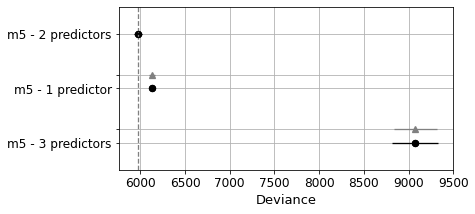

In [54]:
az.plot_compare(comp)
plt.grid()
plt.show()

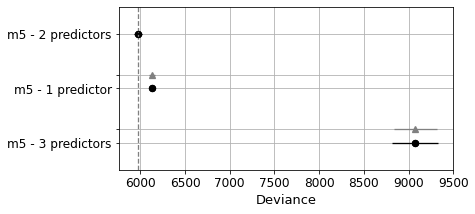

In [55]:
comp = az.compare(comp_dict, ic='waic', scale='deviance')
az.plot_compare(comp)
plt.grid()
plt.show()